<a href="https://colab.research.google.com/github/syedanida/Clustering/blob/main/anomalydetectionUsing_pyOD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install the required library
!pip install pyod matplotlib pandas numpy scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-2.0.2-py3-none-any.whl size=198469 sha256=e25290ca5828e3967d2f1c22cb1686cfd5285d031d1efb7d503b8be84482b2d0
  Stored in directory: /root/.cache/pip/wheels/77/c2/20/34d1f15b41b701ba69f42a32304825810d680754d509f91391
Successfully built pyod


In [2]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyod.models.iforest import IForest  # Isolation Forest
from pyod.models.auto_encoder import AutoEncoder  # AutoEncoder
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler

In [3]:
# Step 1: Generate synthetic multivariate data
print("Generating synthetic data...")
n_samples = 1000
n_features = 2
X, y = make_blobs(n_samples=n_samples, centers=2, n_features=n_features, random_state=42)

Generating synthetic data...


In [5]:
# Add anomalies (outliers)
n_anomalies = 50
np.random.seed(42)
anomalies = np.random.uniform(low=-10, high=10, size=(n_anomalies, n_features))
X_with_anomalies = np.vstack([X, anomalies])
y_with_anomalies = np.hstack([np.zeros(n_samples), np.ones(n_anomalies)])  # 1 for anomalies


In [6]:
# Normalize the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_with_anomalies)

In [7]:
# Convert to DataFrame for better handling
data = pd.DataFrame(X_scaled, columns=["Feature_1", "Feature_2"])
data["Anomaly"] = y_with_anomalies
print("Data generation complete!")

Data generation complete!


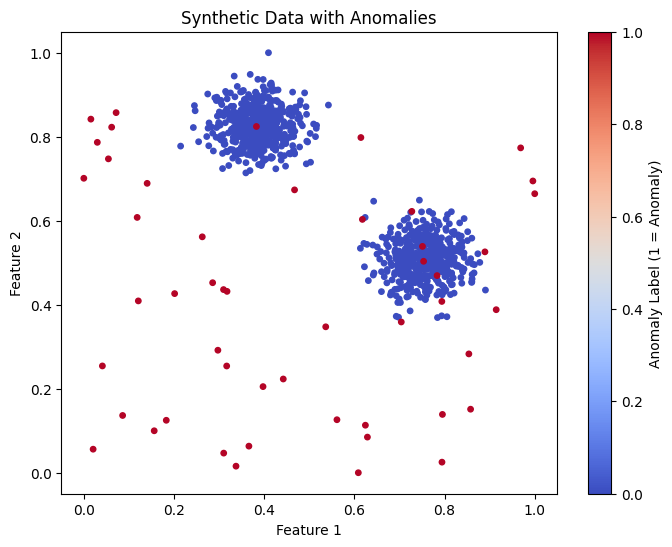

In [8]:
# Step 2: Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(data["Feature_1"], data["Feature_2"], c=data["Anomaly"], cmap="coolwarm", s=15)
plt.title("Synthetic Data with Anomalies")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Anomaly Label (1 = Anomaly)")
plt.show()

In [12]:
!pip install pyod
from pyod.models.auto_encoder import AutoEncoder

In [9]:
# Step 3: Initialize and fit PyOD models
print("Fitting models...")

Fitting models...


In [10]:
# Isolation Forest
iforest = IForest(contamination=0.05)  # Assumes 5% anomalies
iforest.fit(X_scaled)

IForest(behaviour='old', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=1,
    random_state=None, verbose=0)

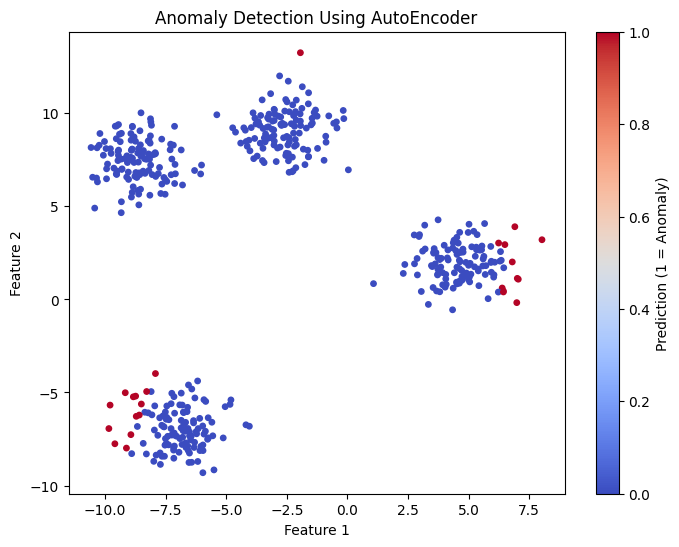

In [17]:
from pyod.models.auto_encoder import AutoEncoder
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate synthetic data
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=500, centers=4, cluster_std=1.1, random_state=42)

# Scale the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the AutoEncoder
autoencoder = AutoEncoder(
    contamination=0.05,    # Percentage of anomalies in the dataset
    #epochs=30,             # Number of epochs for training
    batch_size=32,         # Batch size
    verbose=0              # Suppress verbose output
)

# Fit the AutoEncoder model
autoencoder.fit(X_scaled)

# Predict anomalies
predictions = autoencoder.predict(X_scaled)  # 1 = anomaly, 0 = normal
scores = autoencoder.decision_function(X_scaled)  # Anomaly scores

# Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=predictions, cmap="coolwarm", s=15)
plt.title("Anomaly Detection Using AutoEncoder")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Prediction (1 = Anomaly)")
plt.show()


In [18]:
# Step 4: Predict anomalies
iforest_predictions = iforest.predict(X_scaled)  # 1 = anomaly, 0 = normal
autoencoder_predictions = autoencoder.predict(X_scaled)


In [21]:
# Step 5: Visualize results from Isolation Forest

from sklearn.ensemble import IsolationForest

# Use all features for training
X_scaled = scaler.fit_transform(data[["Feature_1", "Feature_2"]])

# Train the model
iforest_model = IsolationForest(contamination=0.05, random_state=42)
iforest_model.fit(X_scaled)

# Predict anomalies
iforest_predictions = iforest_model.predict(X_scaled)  # Ensure alignment

In [22]:
# Convert predictions to 0 (normal) and 1 (anomaly)
iforest_predictions = np.where(iforest_predictions == -1, 1, 0)

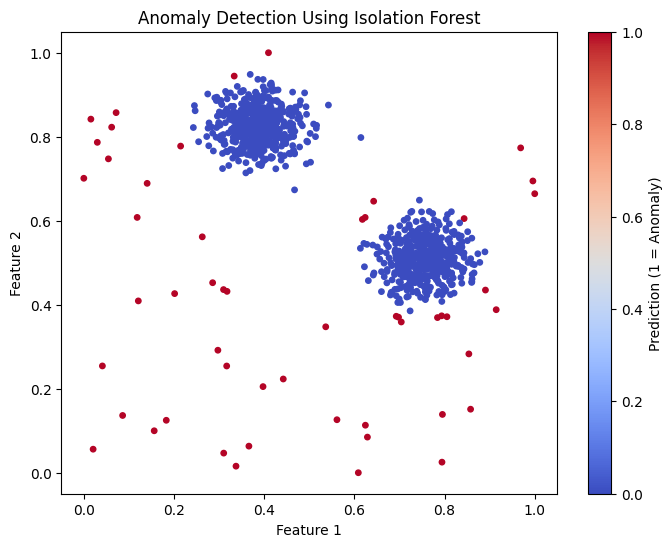

In [23]:
# Plot anomaly detection results
plt.figure(figsize=(8, 6))
plt.scatter(
    data["Feature_1"],
    data["Feature_2"],
    c=iforest_predictions,
    cmap="coolwarm",
    s=15
)
plt.title("Anomaly Detection Using Isolation Forest")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Prediction (1 = Anomaly)")
plt.show()


In [27]:
# Step 6: Visualize results from AutoEncoder

from pyod.models.auto_encoder import AutoEncoder

# Ensure the data shape matches expectations
X_scaled = scaler.fit_transform(data[["Feature_1", "Feature_2"]])

# Initialize and train the AutoEncoder
autoencoder = AutoEncoder(contamination=0.05, verbose=0)
autoencoder.fit(X_scaled)

# Predict anomalies
autoencoder_predictions = autoencoder.predict(X_scaled)


In [28]:
# Convert to 0 (normal) and 1 (anomaly)
autoencoder_predictions = np.where(autoencoder_predictions == 1, 1, 0)

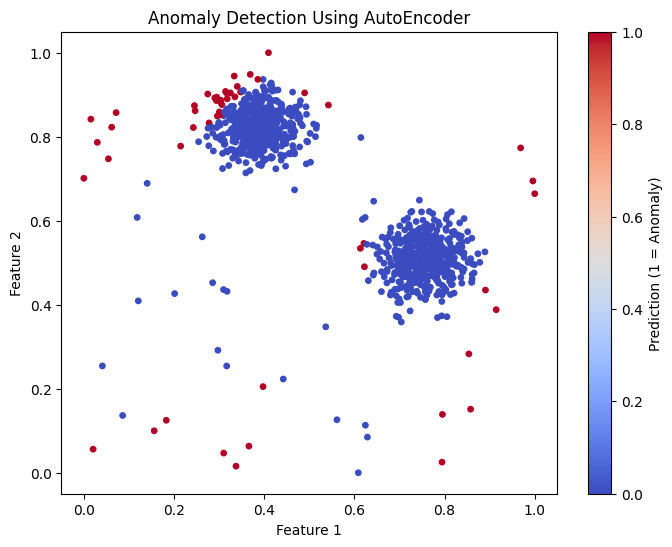

In [29]:
# Check alignment of predictions and data
assert len(autoencoder_predictions) == len(data), "Prediction size mismatch."

# Plot anomaly detection results
plt.figure(figsize=(8, 6))
plt.scatter(
    data["Feature_1"],
    data["Feature_2"],
    c=autoencoder_predictions,
    cmap="coolwarm",
    s=15
)
plt.title("Anomaly Detection Using AutoEncoder")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Prediction (1 = Anomaly)")
plt.show()


In [30]:
# Step 7: Evaluation of models
from sklearn.metrics import classification_report

print("Classification Report for Isolation Forest:")
print(classification_report(y_with_anomalies, iforest_predictions))

print("Classification Report for AutoEncoder:")
print(classification_report(y_with_anomalies, autoencoder_predictions))


Classification Report for Isolation Forest:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1000
         1.0       0.77      0.82      0.80        50

    accuracy                           0.98      1050
   macro avg       0.88      0.90      0.89      1050
weighted avg       0.98      0.98      0.98      1050

Classification Report for AutoEncoder:
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97      1000
         1.0       0.40      0.42      0.41        50

    accuracy                           0.94      1050
   macro avg       0.68      0.69      0.69      1050
weighted avg       0.94      0.94      0.94      1050



In [31]:
# Step 8: Save the results
data["IForest_Predictions"] = iforest_predictions
data["AutoEncoder_Predictions"] = autoencoder_predictions
data.to_csv("anomaly_detection_results.csv", index=False)

print("Results saved to 'anomaly_detection_results.csv'!")

Results saved to 'anomaly_detection_results.csv'!
